In [9]:
import pandas as pd
import numpy as np
import calendar as cl
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


Uploading the data

In [8]:
customers=pd.read_csv('C://Users/User/olist_customers_dataset.csv')

In [28]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [20]:
orders=pd.read_csv('C://Users/User/olist_orders_dataset.csv', \
                    parse_dates=['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', \
                    'order_delivered_customer_date', 'order_estimated_delivery_date'])

In [29]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [13]:
order_items=pd.read_csv('C://Users/User/olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

In [30]:
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


Checking data for duplicates, missing values, matching data types

In [24]:
customers.isna().sum() # no missing values
customers.dtypes # required types
customers.loc[customers.duplicated()] # no duplicates
orders.isna().sum() # the missing values indicate that not all orders have been paid/transferred to logistics/delivered
orders.dtypes # date columns are processed when loading data
orders.loc[orders.duplicated()] # no duplicates
order_items.isna().sum() # no missing values
order_items.dtypes
order_items.loc[order_items.duplicated()] # no duplicates

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


I am conducting a cohort analysis of users. In the period from January to December, I'm going to identify the cohort with the highest retention for the 3rd month

In [36]:
# Merging data from three tables for further analysis
total_data=customers.merge(orders, how='inner', on='customer_id').merge(order_items, how='left', on='order_id')

In [35]:
total_data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79


In [37]:
# Filtering the data where there is a delivery date
total_data=total_data.query('order_delivered_customer_date != "NaT"')

In [40]:
# Converting the data to the year-month format
total_data['orders_year_month']=total_data['order_delivered_customer_date'].dt.strftime('%Y-%m')

<Axes: xlabel='orders_year_month', ylabel='count_orders'>

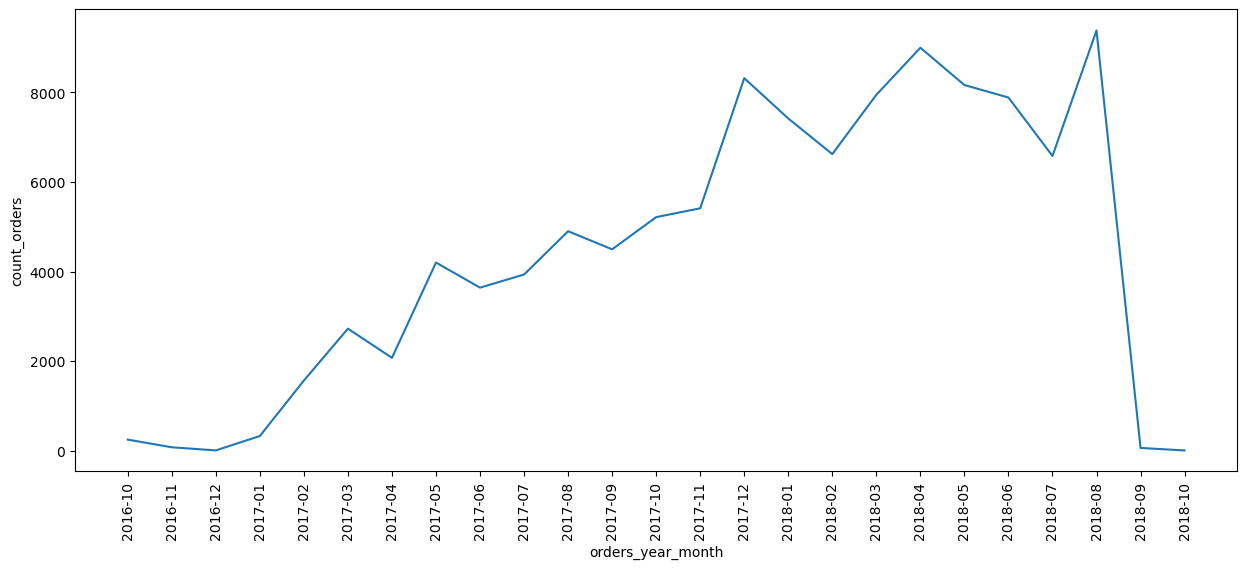

In [45]:
# Distribution of user purchases by month
distribution_by_month=total_data.groupby(['orders_year_month'], as_index=False)  \
            .agg({'customer_unique_id':'count'})  \
            .sort_values('orders_year_month')  \
            .rename(columns={'customer_unique_id': 'count_orders'})

plt.figure(figsize=(15,6))
plt.xticks(np.arange(len(by_month)), by_month['orders_year_month'], rotation=90)
sns.lineplot(x='orders_year_month', y ='count_orders', data=by_month)

In [47]:
# Defining the date of each customer's first purchase
first_purchases=total_data.groupby('customer_unique_id', as_index=False) \
                                .agg({'order_delivered_customer_date': 'min'}) \
                                .rename(columns={'order_delivered_customer_date':'first_orders_period'})
first_purchases['first_orders_period']=first_purchases['first_orders_period'].dt.strftime('%Y-%m')
first_purchases.head(3)

,customer_unique_id,first_orders_period
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-04


In [51]:
# Adding a column with the date of the first purchase to the common data frame and taking the necessary columns
first_date_merge = total_data.merge(first_orders, how='inner', on='customer_unique_id')
first_date_merge = first_date_merge[['customer_unique_id', 'orders_year_month', 'first_orders_period']]
first_date_merge.head(3)

,customer_unique_id,orders_year_month,first_orders_period
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-06,2018-06


In [56]:
# Defining the total number of users who have made a purchase by month and adding this column to the table from the 
# previous step
total_user=first_date_merge.groupby('first_orders_period', as_index=False)  \
                    .agg({'customer_unique_id':'nunique'})  \
                    .rename(columns={'customer_unique_id':'total_user'})
df_cohorts=first_date_merge.merge(total_user, how='left', on='first_orders_period')
df_cohorts.head(3)

,customer_unique_id,orders_year_month,first_orders_period,total_user
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05,3673
1,290c77bc529b7ac935b93aa66c333dc3,2018-01,2018-01,6401
2,060e732b5b29e8181a18229c7b0b2b5e,2018-06,2018-06,6565


In [65]:
# Counting the number of users from the cohort who made a purchase

cohorts=df_cohorts.groupby(['first_orders_period', 'orders_year_month'])  \
                .agg({'customer_unique_id':'nunique', 'total_user':'max'})  \
                .rename(columns={'customer_unique_id': 'users_of_cohorts'})

# будем рассматривать когорты только за 2017 год плюс 3 месяца 2018, чтобы отследить CRR на третий месяц
cohorts=cohorts.query('"2016-12" < first_orders_period < "2018-01" and orders_year_month < "2018-04"')
cohorts.head()

users_of_cohorts  total_user
first_orders_period orders_year_month                              
2017-01             2017-01                         263         263
                    2017-02                           3         263
                    2017-03                           1         263
                    2017-05                           1         263
                    2017-06                           1         263

In [66]:
cohorts.reset_index(inplace=True)
cohorts.head(3)

,first_orders_period,orders_year_month,users_of_cohorts,total_user
0,2017-01,2017-01,263,263
1,2017-01,2017-02,3,263
2,2017-01,2017-03,1,263


In [67]:
# retention rate formula: CRR =
# ((Number of customers at the end of the period (total_user) - New users) / Number of customers in the cohort
# (users_of_cohorts)) * 100%

cohorts['CRR']=round(cohorts.users_of_cohorts/cohorts.total_user*100, 2)
cohorts.head()

,first_orders_period,orders_year_month,users_of_cohorts,total_user,CRR
0,2017-01,2017-01,263,263,100.00
1,2017-01,2017-02,3,263,1.14
2,2017-01,2017-03,1,263,0.38
3,2017-01,2017-05,1,263,0.38
4,2017-01,2017-06,1,263,0.38


In [68]:
def cohort_period(date):
    period=0
    sp=date.split('-')
    if sp[0]=="2017":
        period=int(sp[1])
    else:
        period=int(sp[1])+12
    return(period)

cohorts['cohort_period'] = cohorts.orders_year_month.apply(cohort_period)
cohorts.head(3)

,first_orders_period,orders_year_month,users_of_cohorts,total_user,CRR,cohort_period
0,2017-01,2017-01,263,263,100.00,1
1,2017-01,2017-02,3,263,1.14,2
2,2017-01,2017-03,1,263,0.38,3


In [69]:
cohorts.set_index(['first_orders_period', 'cohort_period'], inplace=True)
table=cohorts['CRR'].unstack(1)

In [71]:
# Final table with CRR by cohorts and periods
table

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
first_orders_period,,,,,,,,,,,,,,,
2017-01,100.0,1.14,0.38,NaN,0.38,0.38,0.38,0.38,NaN,NaN,0.38,0.76,1.14,NaN,0.38
2017-02,NaN,100.00,0.68,0.23,0.30,0.30,0.15,0.15,0.23,0.08,0.08,0.15,0.38,0.23,0.15
2017-03,NaN,NaN,100.00,0.55,0.30,0.43,0.30,0.09,0.30,0.26,0.30,0.21,0.26,0.04,0.04
2017-04,NaN,NaN,NaN,100.00,0.78,0.28,0.22,0.28,0.17,0.28,0.06,0.39,0.22,0.28,0.11
2017-05,NaN,NaN,NaN,NaN,100.00,0.74,0.33,0.16,0.35,0.38,0.25,0.35,0.22,0.22,0.25
2017-06,NaN,NaN,NaN,NaN,NaN,100.00,0.70,0.58,0.45,0.35,0.26,0.38,0.19,0.19,0.22
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.66,0.18,0.42,0.27,0.27,0.39,0.27,0.21
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.67,0.48,0.19,0.31,0.53,0.24,0.24
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,1.07,0.29,0.42,0.42,0.29,0.23


<Axes: title={'center': 'Cohorts: Retention Rate'}, xlabel='cohort_period', ylabel='first_orders_period'>

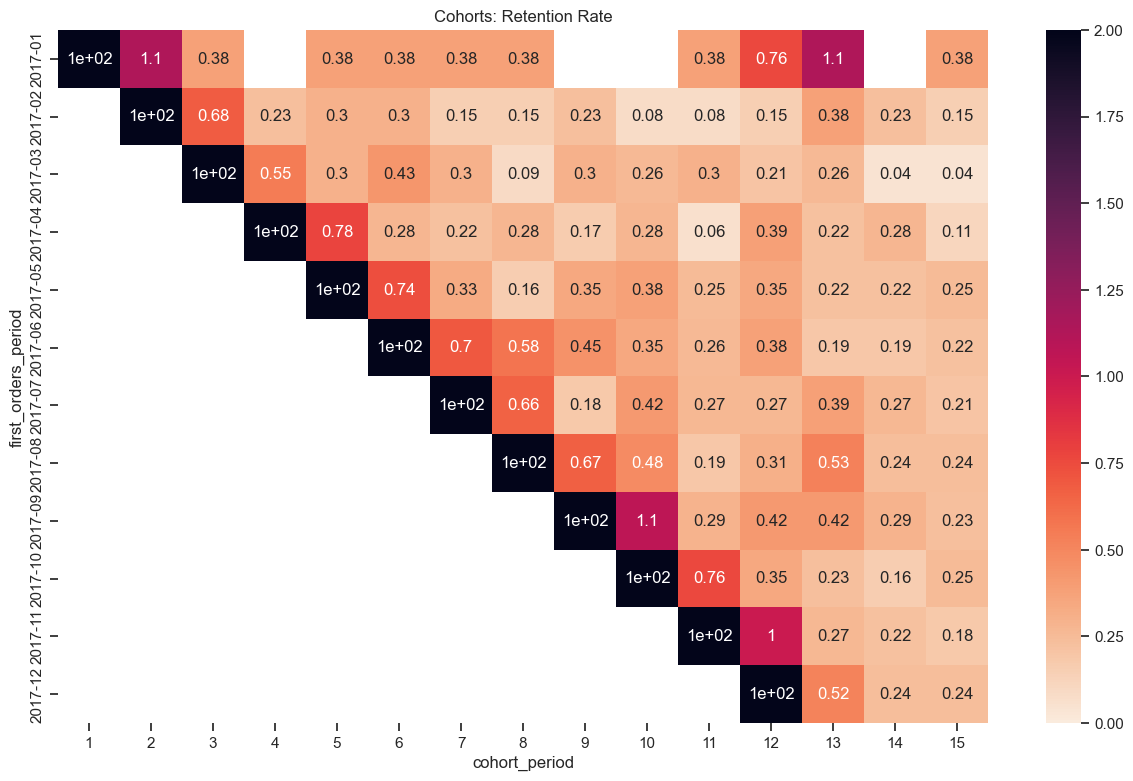

In [77]:
# Heat map
# As we can see, the CRR for all cohorts does not have particularly high values, and the largest of them are observed in the first 
# month after the month cohort formation. Thus, we can judge the inability of a business to retain its customers. In this example
# it can be seen that less than 1% of users make repeat purchases
cmap = sns.cm.rocket_r
sns.set(style='ticks')
plt.figure(figsize=(15, 9))
plt.xlabel('Cohorts')
plt.title('Cohorts: Retention Rate')
sns.heatmap(table, annot=True, cmap=cmap, vmin=0, vmax=2, center= 1)

In [73]:
# Search for the cohort with the highest CRR for the third month
max_crr=cohorts.copy()
max_crr.reset_index(inplace=True)

sp1, sp2=[], []
for i, row in max_crr.iterrows():
    coh=int(row['first_orders_period'].split('-')[1])
    if row['cohort_period']==(coh+3):
        sp1.append(row['first_orders_period'])
        sp2.append(row['CRR'])

In [74]:
df=pd.DataFrame({'coh': sp1, 'CRR': sp2})
df.loc[df['CRR'].idxmax()]

coh    2017-06
CRR       0.45
Name: 4, dtype: object